# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

# Loading and Reading the dataset

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
len(df.columns)

16

#### The dataset has 16 columns with 730 rows and no missing values

# Data Cleaning

## 1. Dropping unnecessary columns 
- Instant: Acts as index in the dataset
- Dtedat: Already have similar variables (month, year, weekday)
- casual, registered: There won't be available at the time of prediction, also, casual+registered= cnt. There exists a simple linear relationship
- atemp and temp are closely related. However it makes more sense to keep the 'temp' variable and drop the 'atemp' variable as the feeling temperture is not more important than the actual temperature on a particular day

In [8]:
df.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## 2. Missing Values and Duplicates check:

In [10]:
df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [11]:
len(df)

730

In [12]:
len(df.drop_duplicates())

730

#### There are no duplicates or missing valus in the dataset

## Checking for Junks/Unkowns:

In [13]:
for i in df:
    print(df[i].value_counts(ascending=False), '\n \n \n')

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 
 
 

yr
0    365
1    365
Name: count, dtype: int64 
 
 

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 
 
 

holiday
0    709
1     21
Name: count, dtype: int64 
 
 

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 
 
 

workingday
1    499
0    231
Name: count, dtype: int64 
 
 

weathersit
1    463
2    246
3     21
Name: count, dtype: int64 
 
 

temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 
 
 

hum
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: count, Length: 594, dtype: int64 
 
 

windspeed
9.041918     3
11.

#### There are no junks or unknown values in the dataset

## Outlier Check

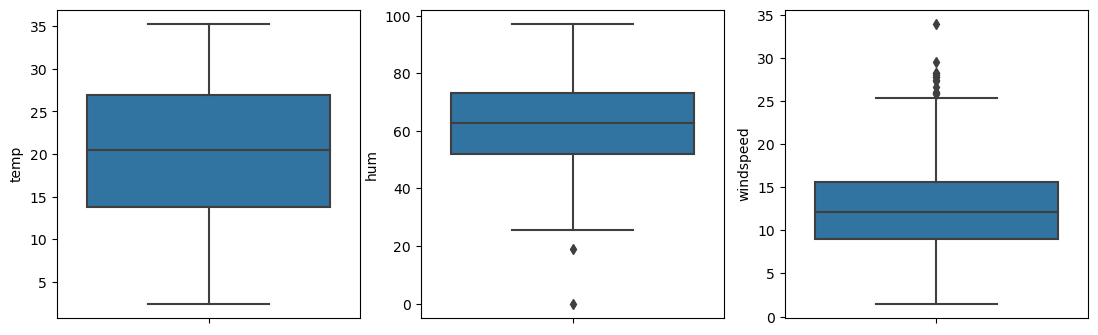

In [14]:
cols = ['temp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))
i=1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data = df)
    i+=1

#### There are no significant outliers as such

# Exploratory Data Analysis

## Typecasting

In [15]:
df.season.replace({1:"spring", 2:"summer", 3:'fall', 4:'winter'}, inplace=True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace=True)
df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,43.6957,12.522300,1600


In [16]:
# Convert to 'category' data type

df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')

# Visualizations

<Figure size 1500x3000 with 0 Axes>

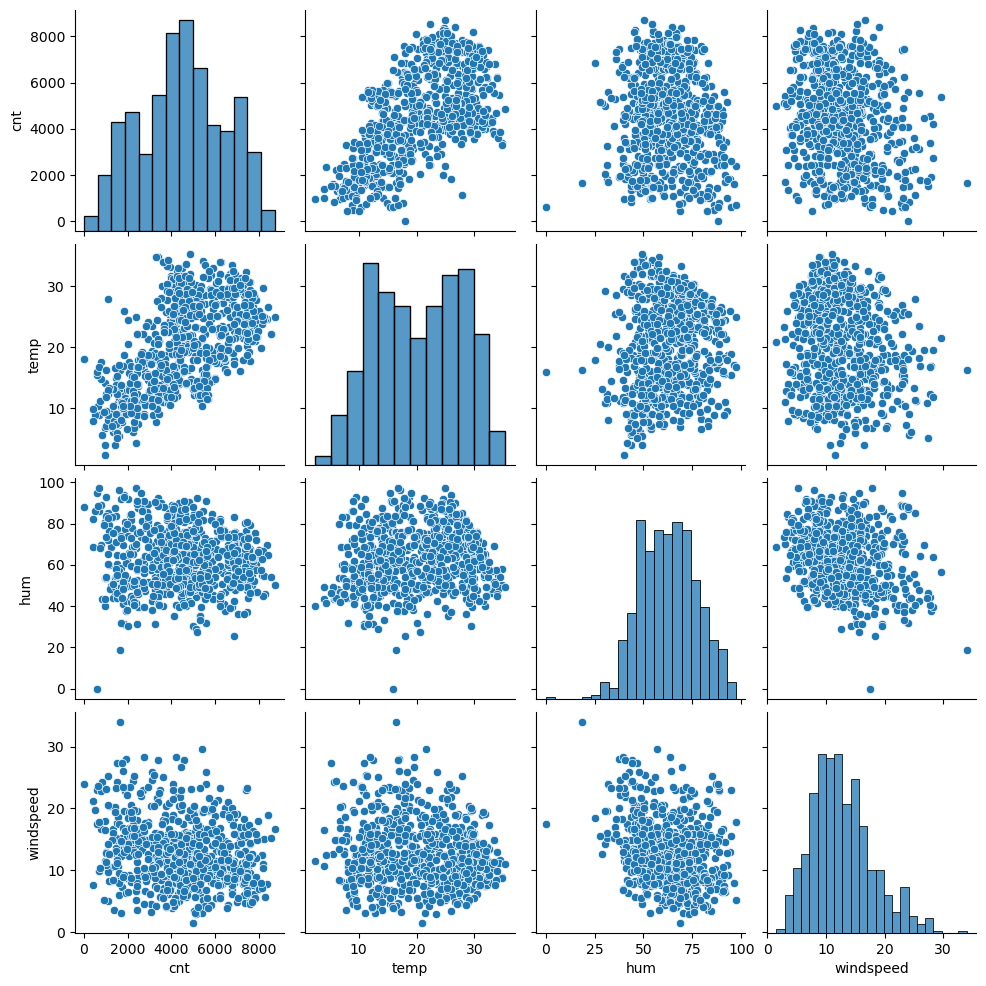

In [17]:
plt.figure(figsize=(15,30))
sns.pairplot(data = df, vars = ['cnt', 'temp', 'hum', 'windspeed'])
plt.show()

#### - Temp seems to have the highest correlation with the target variale cnt

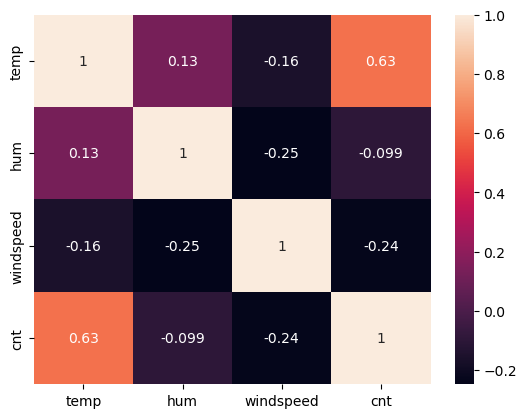

In [18]:
sns.heatmap(df[['temp', 'hum', 'windspeed', 'cnt']].corr(),annot=True)
plt.show()

# Categorical Variables vs Target Variable

- Fall and Summer come with the highest demand for motorcycles, Spring might be termed as 'Off-Season'
- There seems to be a significant growth in demand for 2018 and 2019
- June, July and August can be termed as the peak season since the median is also high and the spread is low. September october also see a high demand on some days, but could not be considered as the peak seasons due to the meadian being lower and spread being higher
- 

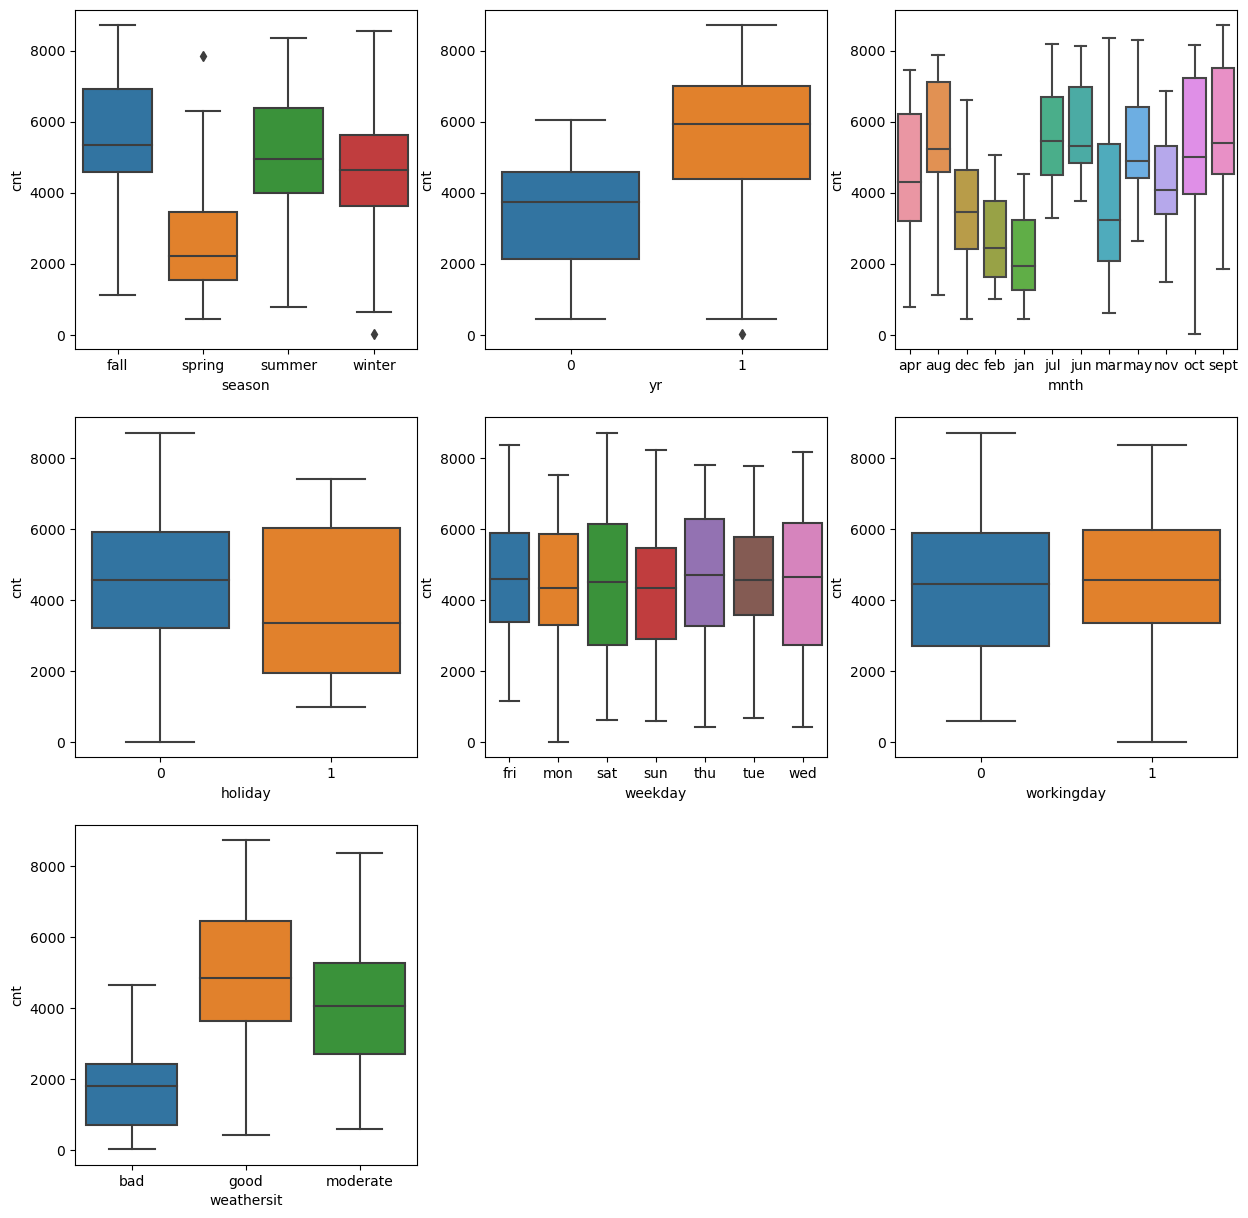

In [19]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

# Continuous Variables vs Target Variable

## 1. Temp

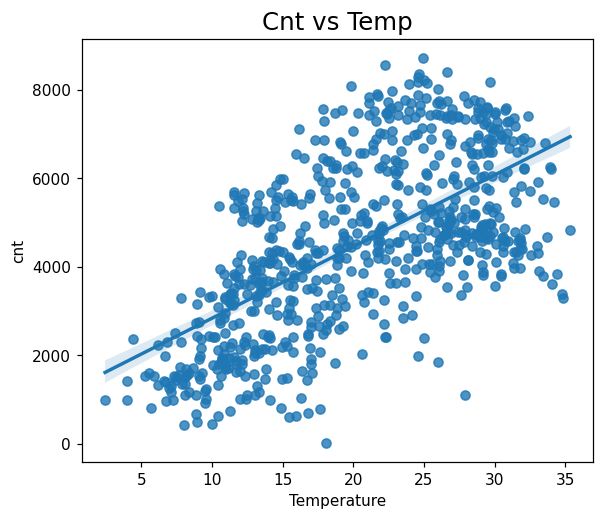

In [20]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### We can see a positive correlation between temperature and our target variable

## 2. Humidity

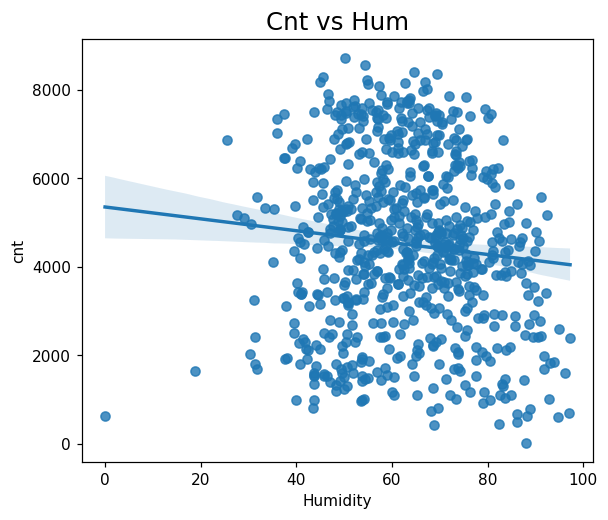

In [21]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### There is a weak negative relationship between the demand of the bikes and the humidity, also the points are way more scattered

## 3. Windspeed

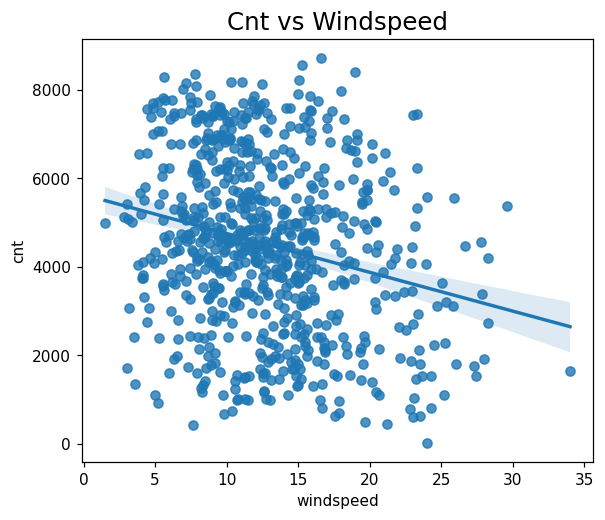

In [22]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

#### Here we can see a bit stronger negative relationship between bike demand and windspeed. The data points are still scattered a lot

# Data Preparation

## Creating dummy variables for all categorical variables

In [23]:
df= pd.get_dummies(data=df, columns = ['season', 'mnth', 'weekday'], drop_first=True, dtype =int)
df = pd.get_dummies(data=df, columns=['weathersit'], dtype= int)

In [24]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [25]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   season_spring        730 non-null    int32  
 8   season_summer        730 non-null    int32  
 9   season_winter        730 non-null    int32  
 10  mnth_aug             730 non-null    int32  
 11  mnth_dec             730 non-null    int32  
 12  mnth_feb             730 non-null    int32  
 13  mnth_jan             730 non-null    int32  
 14  mnth_jul             730 non-null    int32  
 15  mnth_jun             730 non-null    int

# Model Building

## Train Test Split

In [27]:
df.shape

(730, 30)

In [29]:
#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df
#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


## Scaling Variables

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [36]:
cols = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
X_train[cols]= scaler.fit_transform(X_train[cols])
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,5.110000e+02,5.110000e+02,5.110000e+02,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,1.703356e-16,3.476236e-17,1.373113e-16,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,1.000980e+00,1.000980e+00,1.000980e+00,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,-2.426671e+00,-4.558466e+00,-2.237274e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.662834e-01,-7.635563e-01,-7.168956e-01,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.076170e-01,4.018002e-02,-1.625414e-01,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,8.554967e-01,7.163583e-01,6.018668e-01,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.978457e+00,2.409813e+00,3.155398e+00,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [40]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [41]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 5),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [42]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [43]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [44]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [45]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [51]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'season_spring',
     'season_winter', 'mnth_dec','mnth_jul', 'mnth_mar', 'mnth_nov','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate','weathersit_good']]

In [52]:
X_train_rfe.shape

(511, 15)

## Model 1

In [53]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'season_spring',
     'season_winter', 'mnth_dec','mnth_jul', 'mnth_mar', 'mnth_nov','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.18e-183
Time:                        18:09:44   Log-Likelihood:                -4134.0
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     496   BIC:                             8361.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1988.8685    

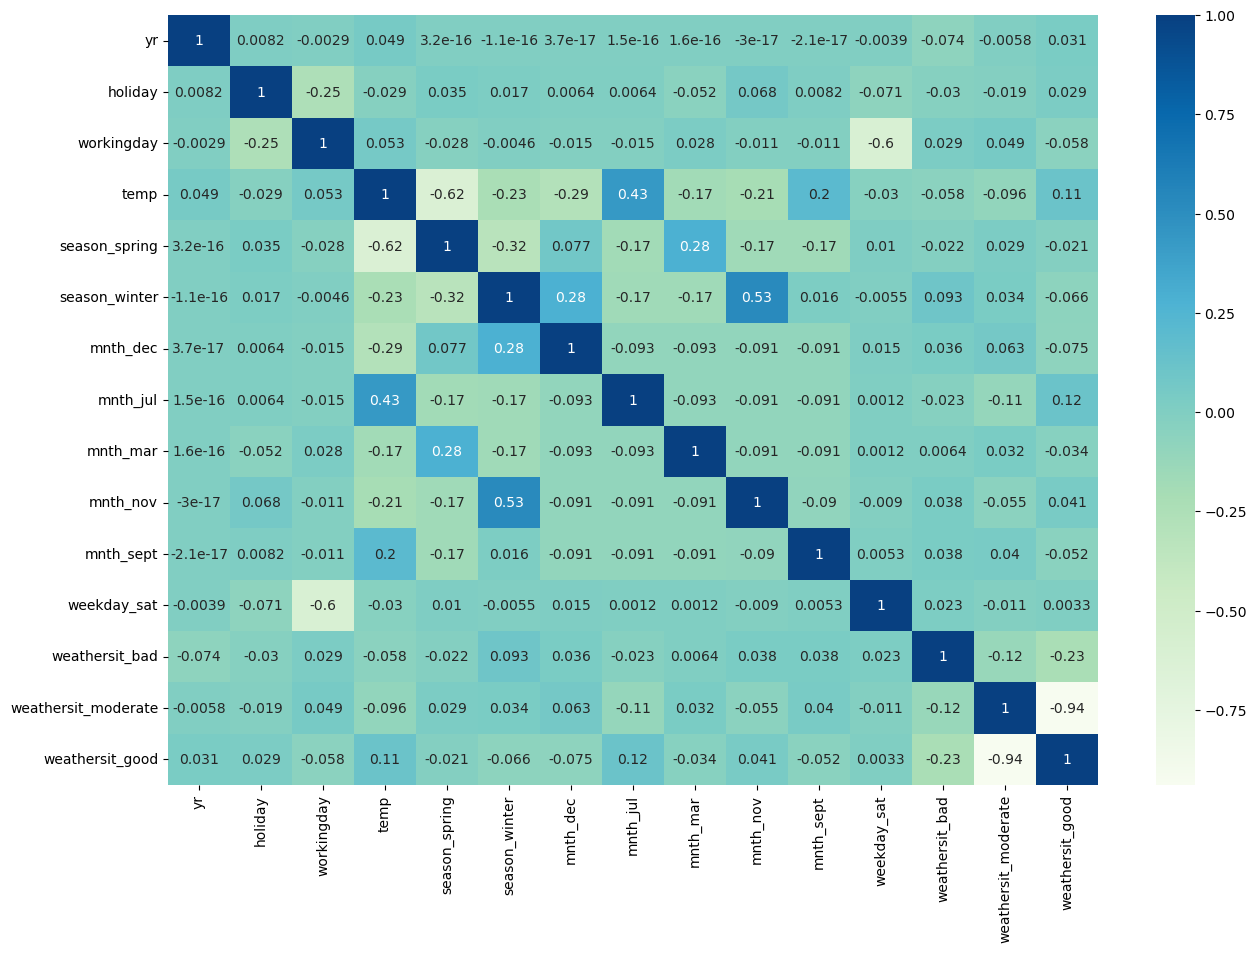

In [56]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'workingday', 'temp', 'season_spring',
     'season_winter', 'mnth_dec','mnth_jul', 'mnth_mar', 'mnth_nov','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate','weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

In [57]:
#Dropping the holiday column as it has high p value and is thus insignigficant
cols = ['yr', 'workingday', 'temp', 'season_spring',
     'season_winter', 'mnth_dec','mnth_jul', 'mnth_mar', 'mnth_nov','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.45e-184
Time:                        18:14:57   Log-Likelihood:                -4134.7
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     497   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1960.4412    

In [58]:
#dropping weathersit_good as it has a relatively high VIF
#Dropping the holiday column as it has high p value and is thus insignigficant
cols = ['yr', 'workingday', 'temp', 'season_spring',
     'season_winter', 'mnth_dec','mnth_jul', 'mnth_mar', 'mnth_nov','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.45e-184
Time:                        18:17:57   Log-Likelihood:                -4134.7
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     497   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3657.3388    

In [59]:
#Let us take this as our final model as all the p values are less than 0.05 and the VIF values are well within 5
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [60]:
cols = ['yr', 'workingday', 'temp', 'season_spring',
     'season_winter', 'mnth_dec','mnth_jul', 'mnth_mar', 'mnth_nov','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

lr = build_model_sk(X_train[cols], y_train)
print(lr.intercept_, lr.coef_)

3657.3387987948036 [ 2001.70854174   407.52329187   794.36472112 -1307.20292436
   794.39679149  -517.4872306   -384.64742574   481.16030894
  -704.24175766   444.73750241   454.21693483 -2422.62123663
  -707.63018299]


# Model Evaluation

In [61]:
y_train_pred = lr.predict(X_train[cols])

In [62]:
def plot_hist(actual, predicted):
    sns.distplot(actual-predicted)
    plt.title('Error Terms')
    plt.xlabel('Errors')

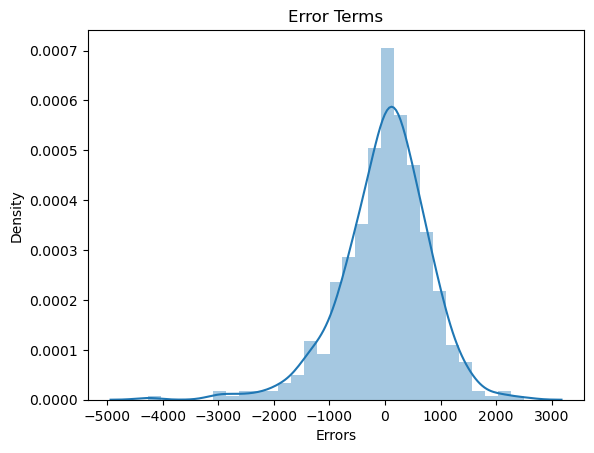

In [63]:
plot_hist(y_train, y_train_pred)

#### Errors seem to be normally distributed mean centered around 0

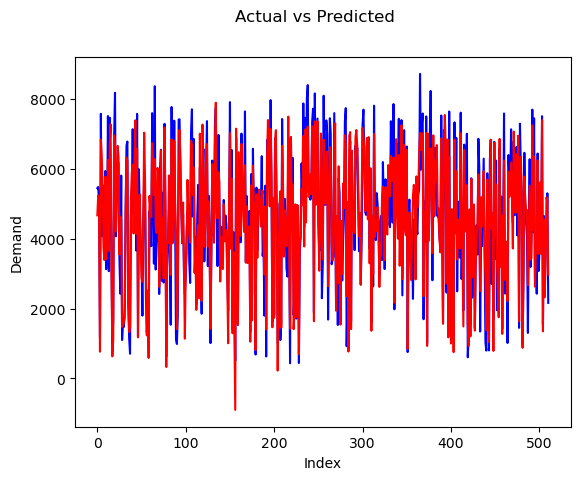

In [65]:
c = [i for i in range(0, len(X_train),1)]
plt.plot(c, y_train, color = "blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Demand")
plt.show()

#### Actual values and predicted values seem to follow almost the same pattern

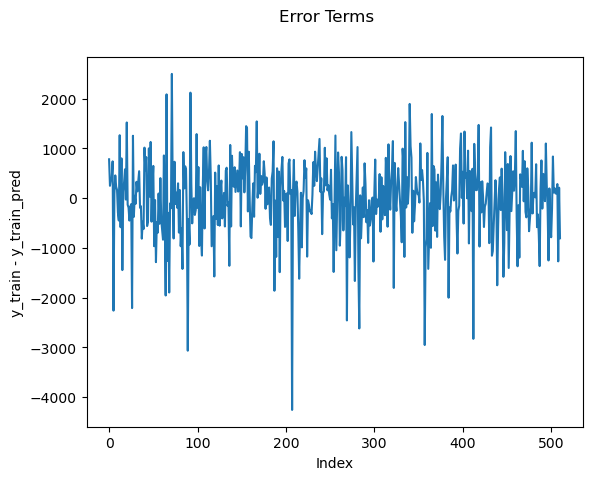

In [67]:
c = [i for i in range(0, len(X_train),1)]
plt.plot(c, y_train-y_train_pred)
plt.suptitle("Error Terms")
plt.xlabel("Index")
plt.ylabel("y_train - y_train_pred")
plt.show()

#### Errors are independent of each other

In [68]:
r2_score(y_train, y_train_pred)

0.8334415619089887

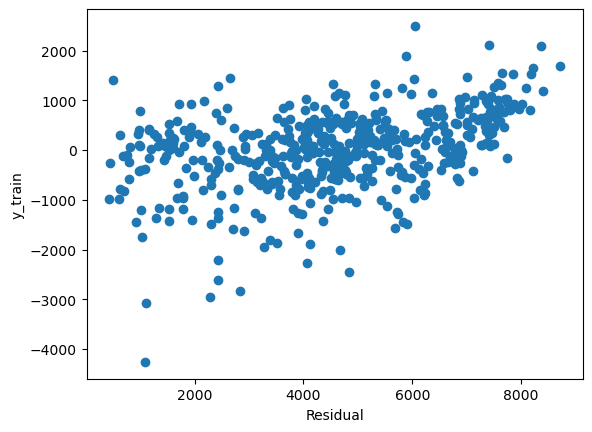

In [69]:
# Linearity check
residual = (y_train - y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Predictions for test set

In [70]:
cols = ['temp', 'hum', 'windspeed']
X_test[cols] = scaler.transform(X_test[cols])

In [71]:
cols = ['yr', 'workingday', 'temp', 'season_spring',
     'season_winter', 'mnth_dec','mnth_jul', 'mnth_mar', 'mnth_nov','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

y_test_pred = lr.predict(X_test[cols])

# R squared for predictions

In [72]:
r2_score(y_test, y_test_pred)

0.8138458670945377

### this is almost similar to our training model r squared.
### This means that the model is indeed a good fit and can perform good on the unseen data as well

Text(0, 0.5, 'Y_Test Pred')

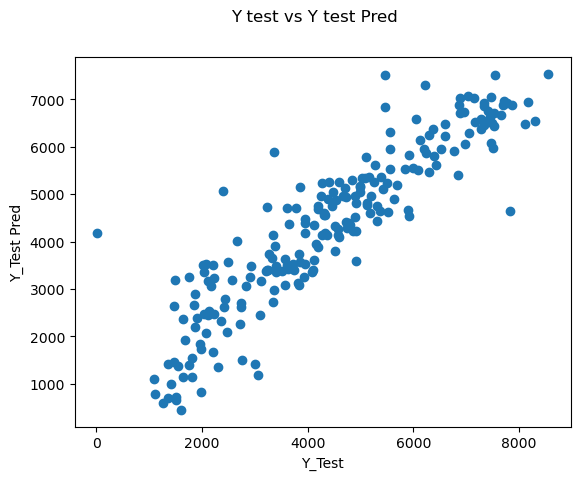

In [74]:
#checking for homoskedasticity
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle("Y test vs Y test Pred")
plt.xlabel("Y_Test")
plt.ylabel("Y_Test Pred")

#### Apart from a few variations, homoskedasticity is maintained

In [75]:
#test and predicted test values plot
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

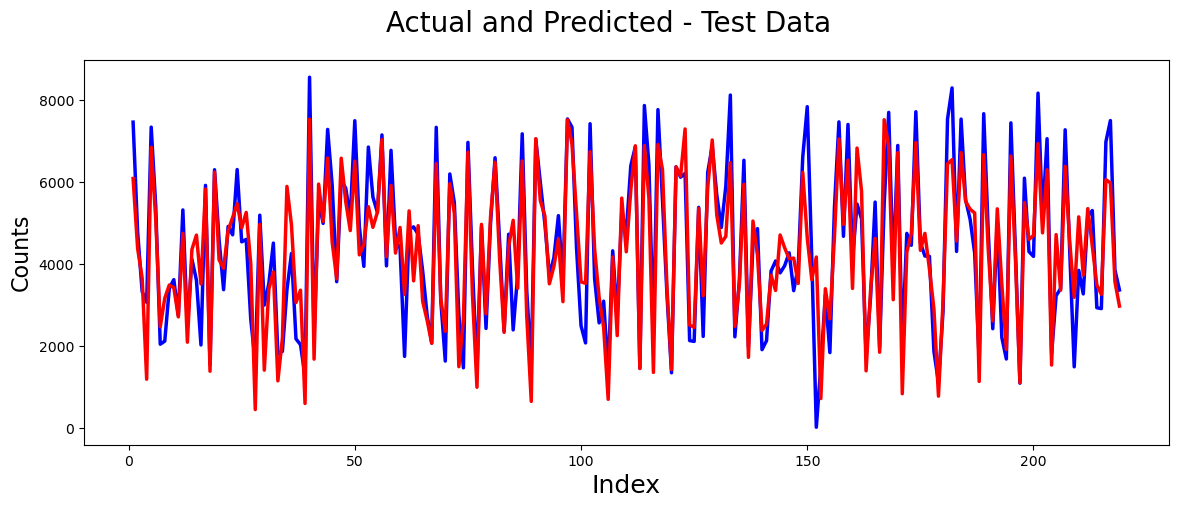

In [76]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Predictions for test data are also sinilar to the actual values

In [77]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

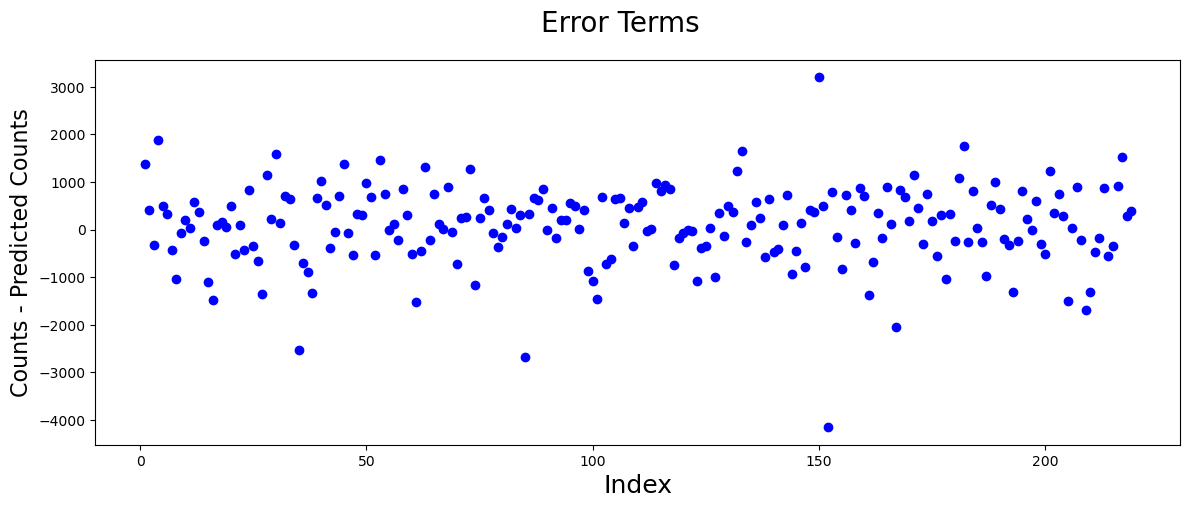

In [78]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### No prominent pattern as such is seen 

# Key takeaways:
1. The top predictors for analyzing the demand of bikes are:
    - Year
    - Working Day or Not 
    - Temperature
    - Seasons like Spring and Winter
    - Months like Jan July March Nov
    - Day of the week
    - Weather Situations
    
2. The company should keep a lookout on these 3 things that directly impact the bike demands:
    - Bad Weather Situation affects the deamnd negatively by a huge number
    - Spring Season affects the demand positively by a huge number 
    - Temperature affects the demand positively by a huge number
     